In [14]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
csv_directory = 'D:\Ayush\College\Sem VII\Lab\ML\Assignments\Mini-Project\Data'  # Update this with the correct path to your CSV files

# List all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# List to hold DataFrames
dfs = []

# Loop through each CSV file and append to the list of DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into one
merged_data = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the merged dataset
print(merged_data.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2014-01-29  40.125000  40.500000  36.562500  36.881302  36.784512   64090.0
1  2014-01-30  37.968800  37.968800  36.337502  36.825001  36.728359   12263.0
2  2014-01-31  36.393799  38.625000  36.393799  38.231300  38.130970   17791.0
3  2014-02-03  38.606300  42.750000  38.606300  41.700001  41.590565  129909.0
4  2014-02-04  41.625000  44.756302  41.250000  43.687500  43.572849  285071.0


In [4]:
# Check the structure of the merged data
print(merged_data.info())

# Check for missing values
print(merged_data.isnull().sum())

# Drop rows with missing values if necessary
merged_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15508660 entries, 0 to 15508659
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
dtypes: float64(6), object(1)
memory usage: 828.3+ MB
None
Date            0
Open         1531
High         1531
Low          1531
Close        1531
Adj Close    1531
Volume       1531
dtype: int64


In [5]:
# Convert 'Date' column to datetime format, if available
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort data by date
merged_data = merged_data.sort_values(by='Date')

# Display the first few rows of sorted data
print(merged_data.head())

               Date       Open       High       Low      Close  Adj Close  \
721615   2000-01-03   3.050000   3.300000   3.05000   3.275000   0.000528   
12661694 2000-01-03   4.500000   4.500000   4.10000   4.100000   2.091736   
14496822 2000-01-03   6.108670   7.774670   6.10867   7.302630   5.446516   
9063550  2000-01-03   7.980000   8.200000   7.98000   8.200000   4.674769   
633710   2000-01-03  22.299999  22.299999  19.25000  19.450001  19.450001   

           Volume  
721615     3000.0  
12661694    600.0  
14496822  21789.0  
9063550   61000.0  
633710     6850.0  


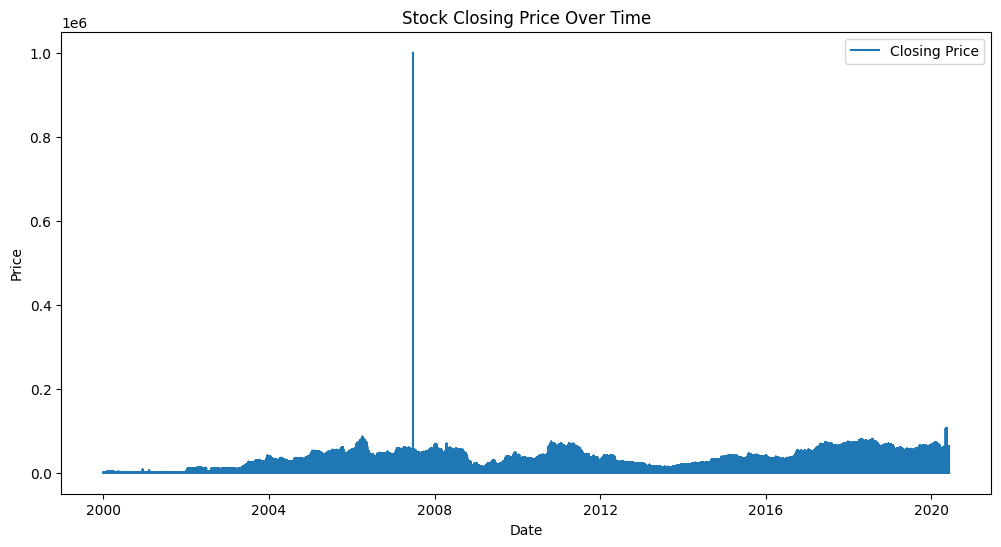

In [6]:
# Plot the closing price trend over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Selecting features (independent variables) and the target (dependent variable)
features = ['Open', 'High', 'Low', 'Volume']  # Example features
target = 'Close'  # We want to predict the closing price

# Split the data into features (X) and target (y)
X = merged_data[features]
y = merged_data[target]

In [9]:
# Sample a smaller portion of the data (e.g., 10% of the dataset)
sampled_data = merged_data.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Split the sampled data
X = sampled_data[features]
y = sampled_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the closing prices on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared value (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 144.26151371668936
R-squared: 0.9998942341687868


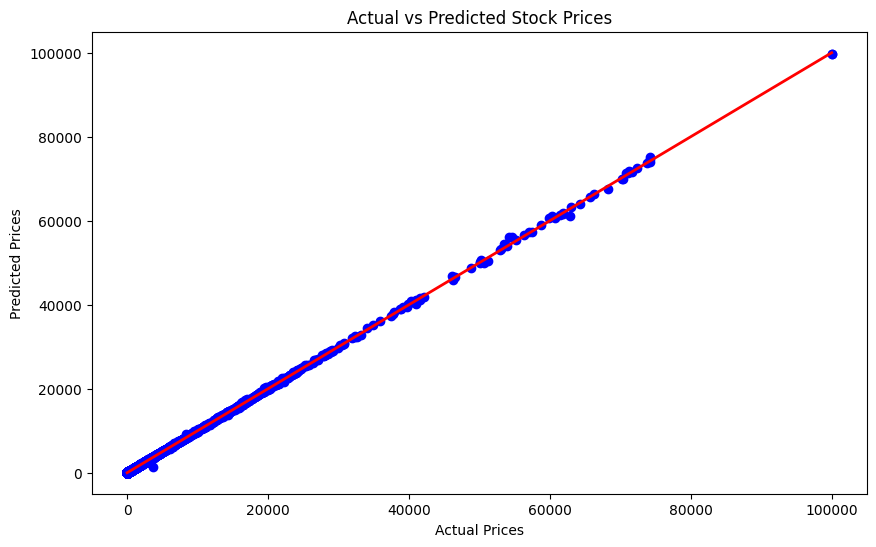

In [12]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

In [17]:
# Predict future stock price using an example from the test set
new_data = X_test.iloc[-1:].copy()  # Use the last row as a DataFrame
predicted_price = model.predict(new_data)
actual_price = y_test.iloc[-1]

print(f"Actual closing price: {actual_price}")
print(f"Predicted future price: {predicted_price[0]}")

Actual closing price: 66.01499938964844
Predicted future price: 66.68174461201843
